### 決定木構造の分析

In [ ]:
ga_dt0={'folder':'../../output/method1/pima',
        'run':1,'gen':50,'index':1}
ga_dt1={'folder':'../../output/method2/pima',
        'run':1,'gen':50,'index':1}
other0={'file':'../../simple_cart/simple_pima/simpleCART.csv',
        'index':1}
ga_dts=[ga_dt0,ga_dt1]
other_dts=[other0]

In [ ]:
import os
os.getcwd()

'c:\\Users\\smdir\\Documents\\MyStudy\\DTGA\\source\\analysis'

In [15]:
#toplist作成 
import pandas as pd
folder="../../output/method2/pima/pima_dn05const_nonuse"
k=10
topn=5

popl=[]
for i in range(k):
    df=pd.read_csv(folder+'/run'+str(i)+'/pop_g50.csv')
    df=df[df['front'] == 0]
    tops=df.nlargest(topn,'F1(test)')
    tops_value_list=tops.loc[:,'F1(test)'].tolist()
    print(tops_value_list)
    popl.append(tops_value_list)

for i in range(3):
    topi=[]
    for j in range(k):
        value=popl[j][i]
        topi.append(value)
    print('top{}-ave:{}'.format(i,sum(topi)/len(topi)))


    
        
        

[0.597, 0.585, 0.575, 0.571, 0.571]
[0.647, 0.646, 0.638, 0.615, 0.606]
[0.667, 0.655, 0.621, 0.618]
[0.667, 0.667, 0.642, 0.596]
[0.618, 0.618, 0.607]
[0.689, 0.689, 0.645, 0.645, 0.635]
[0.839, 0.82, 0.82, 0.743]
[0.649, 0.647, 0.63, 0.63, 0.59]
[0.656, 0.656, 0.642, 0.615, 0.607]
[0.571, 0.556, 0.545, 0.545, 0.517]
top0-ave:0.6599999999999999
top1-ave:0.6538999999999999
top2-ave:0.6365000000000001


In [7]:
import os
os.getcwd()

'c:\\Users\\smdir\\Documents\\MyStudy\\DTGA\\source\\analysis'

In [3]:
#front0のうち一番真ん中に位置するモデルをデプロイする
import pandas as pd
folder="../../output/method2/pima/pima_dn05const_nonuse"
#folder='../../output/method1/pima/pima_basic1.1_fmsz'

k=10
top_list=[]
middle_list=[]
bottom_list=[]
for i in range(k):
    df=pd.read_csv(folder+'/run'+str(i)+'/pop_g50.csv')
    df=df[df['front'] == 0]
    df=df.sort_values(by='F1(ev)', ascending=False)
    middle_index = len(df) // 2 
    top_index = 1
    bottom_index = len(df) * 8//10
    middle_row = df.iloc[middle_index,:].to_dict()
    top_row = df.iloc[top_index,:].to_dict()
    bottom_row = df.iloc[bottom_index,:].to_dict()
    middle_list.append(middle_row)
    top_list.append(top_row)
    bottom_list.append(bottom_row)

dft=pd.DataFrame(top_list)
dft.to_csv(folder+'/top.csv',index=False)
dfm=pd.DataFrame(middle_list)
dfm.to_csv(folder+'/middle.csv',index=False)
dfb=pd.DataFrame(bottom_list)
dfb.to_csv(folder+'/bottom.csv',index=False)

"\n# 最大の行を取り出す\nmax_row = df.loc[df['sum'].idxmax()]\n\nprint(max_row)"

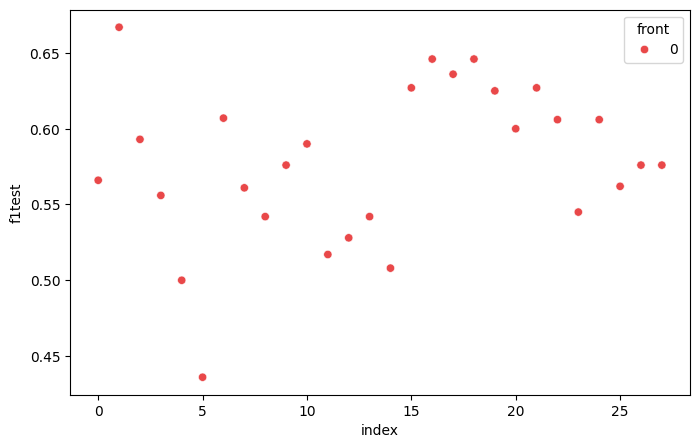

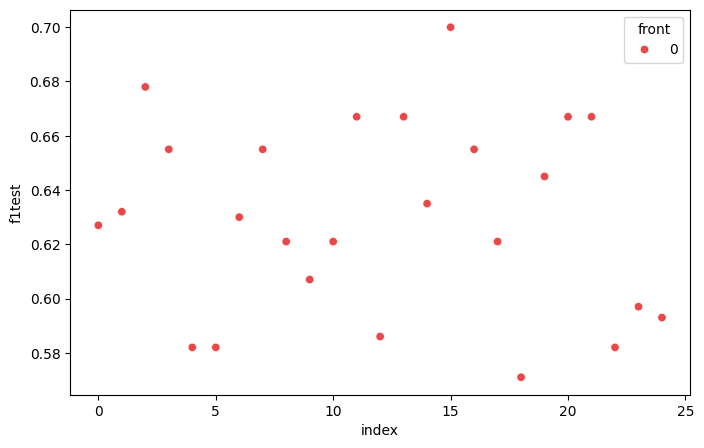

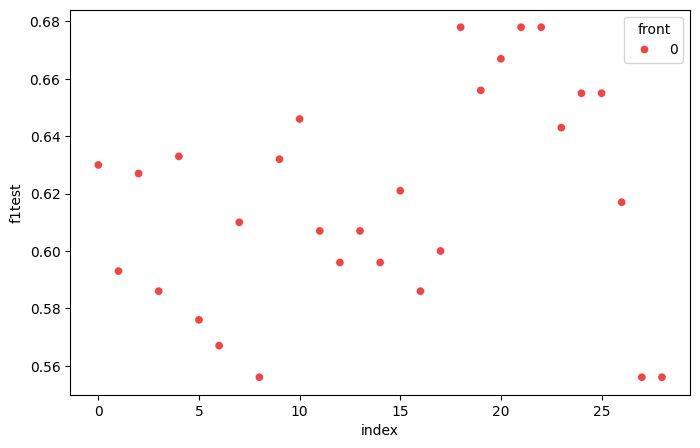

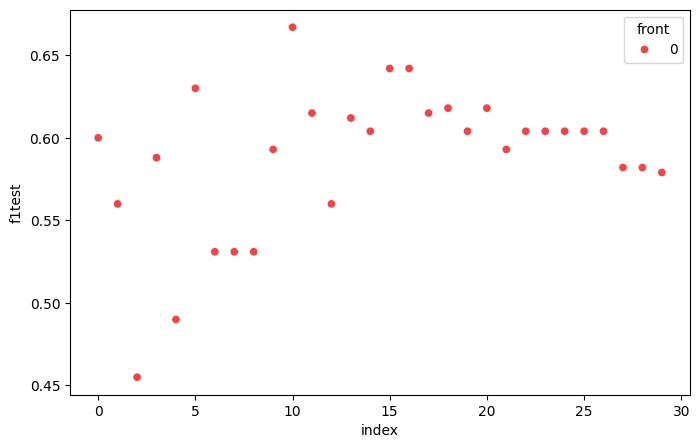

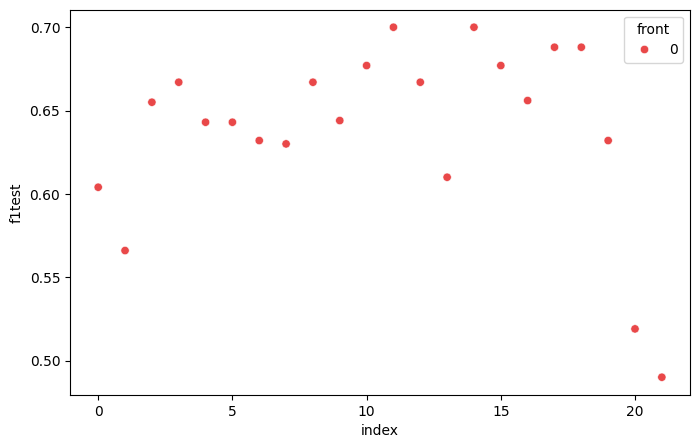

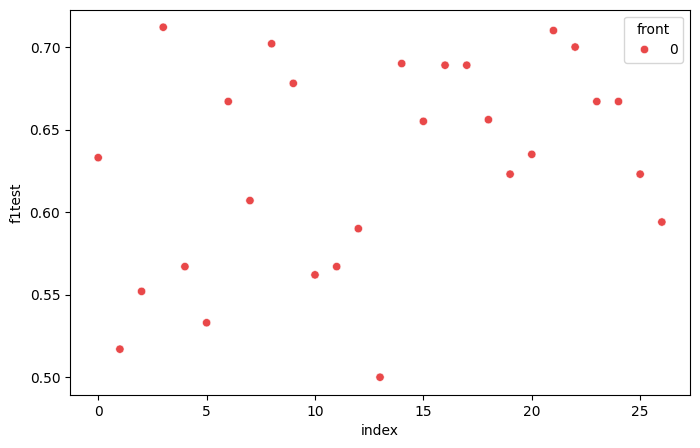

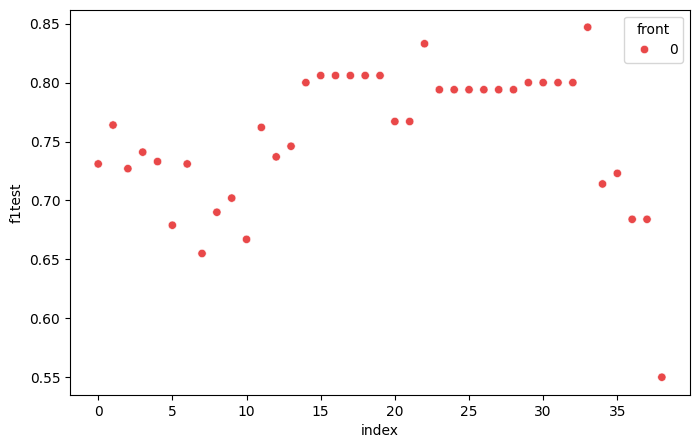

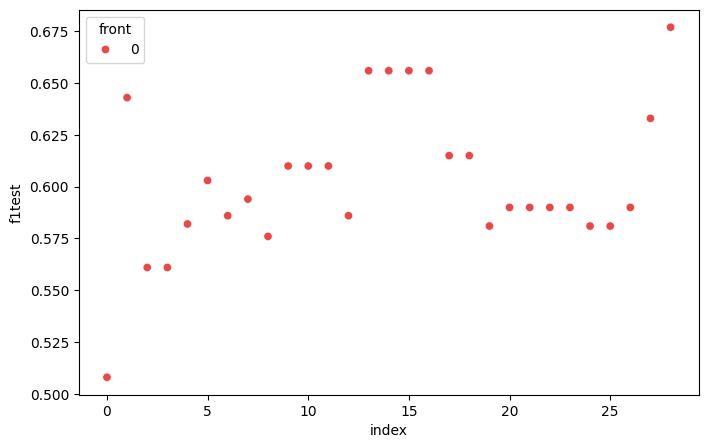

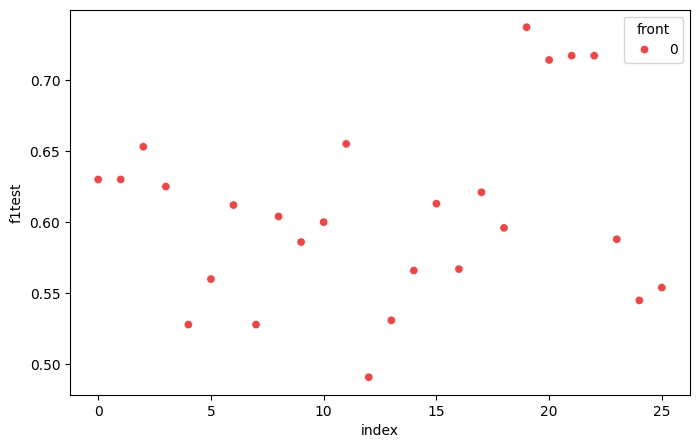

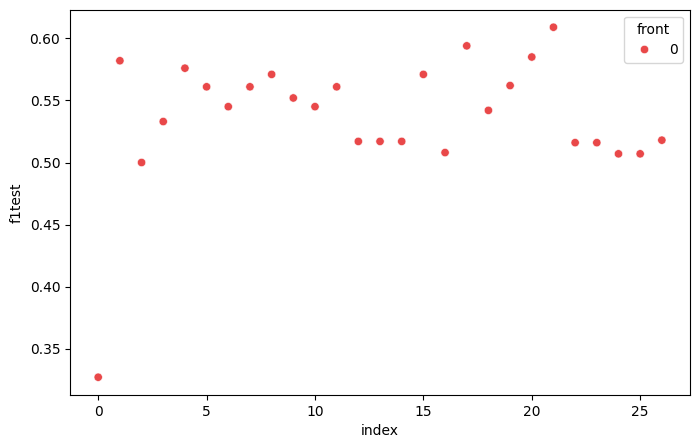

In [31]:
#toplist作成
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
folder="../../output/method2/pima/pima_basic2_fmsz_gen50"
col1='F1(ev)'
col2='size'
k=10
topn=20
for i in range(k):
    df=pd.read_csv(folder+'/run'+str(i)+'/pop_g50.csv')
    df=df[df['front'] == 0]
    df['f'] = df[col2]
    fig = plt.figure(figsize = (8,5))
    ax=sns.scatterplot(data=df, x=df.index, y="F1(test)", hue="front",alpha=0.8,palette="Set1")
    plt.xlabel("index")
    plt.ylabel("f1test")
    

"""
# 最大の行を取り出す
max_row = df.loc[df['sum'].idxmax()]

print(max_row)"""